<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#PR---кривая" data-toc-modified-id="PR---кривая-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>PR - кривая</a></span></li><li><span><a href="#TPR-и-FPR" data-toc-modified-id="TPR-и-FPR-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>TPR и FPR</a></span></li><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>ROC-кривая</a></span></li><li><span><a href="#Сравнение-разных-моделей" data-toc-modified-id="Сравнение-разных-моделей-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Сравнение разных моделей</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Признаки
    
    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата
# Целевой признак

    Exited — факт ухода клиента   

## Подготовка данных

In [1]:
#pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
import seaborn as sn
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
import time

from IPython.display import Audio
sound_file = 'https://www.mediacollege.com/downloads/sound-effects/weapons/machinegun-01.wav'

In [3]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


    Признак 'RowNumber' не несёт никакой информации,он лишний, т.к. есть индекс
    Также есть пропуски в 'Tenure' — сколько лет человек является клиентом банка.
    Целевой признак есть примерно у 20% выборки

In [4]:
display(data.Tenure.value_counts().sum(), data.Tenure.isna().sum())

9091

909

    В 'Tenure' отсутствует около 10% данных, просто удалить их нельзя, поэтому заменю NaN средними значениями взятыми по трём признакам: страна, пол, возраст

In [5]:
Tenure_fill = data.pivot_table(index = ['Geography', 'Gender', 'Age'], 
                               values = 'Tenure', 
                               aggfunc = 'mean'
                               ).round().astype(int)
display(Tenure_fill)

Tenure
Geography Gender Age        
France    Female 19        3
                 20        6
                 21        5
                 22        6
                 23        5
...                      ...
Spain     Male   76        6
                 77        5
                 78        2
                 80        8
                 88       10

[372 rows x 1 columns]

    Для того, чтоб заполнить пропуски, создам в data такие же индексы, как в таблице со средними

In [6]:
data = data.set_index(['Geography', 'Gender', 'Age'])
data['Tenure'] = data['Tenure'].fillna(Tenure_fill['Tenure'], axis = 0)
data = data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Tenure             9997 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


    Осталось 3 пропуска, их удалю
    Проверяю на дубликаты. Уникальным признаком является только 'CustomerId'

In [7]:
data = data.drop_duplicates(['CustomerId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Tenure             9997 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


     Повторов нет. Прежде чем обучать модель нужно провести порядковое кодирование, т. к. некоторые признаки являются категориальными, нужны численные
    'Surname' больше не понадобиться, этот принак никак не влияет на 'Exit', избавлюсь как и от оставшихся NaN

In [8]:
good_data = data.drop(['Surname', 'RowNumber'], axis = 1)
good_data = good_data.dropna()
good_data['Tenure'] = good_data['Tenure'].astype('int64') # количество лет - целое число
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 12 columns):
Geography          9997 non-null object
Gender             9997 non-null object
Age                9997 non-null int64
CustomerId         9997 non-null int64
CreditScore        9997 non-null int64
Tenure             9997 non-null int64
Balance            9997 non-null float64
NumOfProducts      9997 non-null int64
HasCrCard          9997 non-null int64
IsActiveMember     9997 non-null int64
EstimatedSalary    9997 non-null float64
Exited             9997 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.3+ KB


In [9]:
data_ohe = pd.get_dummies(good_data, drop_first=True)
display(data_ohe)

,Age,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,15634602,619,2,0.00,1,1,1,101348.88,1,0,0,0
1,41,15647311,608,1,83807.86,1,0,1,112542.58,0,0,1,0
2,42,15619304,502,8,159660.80,3,1,0,113931.57,1,0,0,0
3,39,15701354,699,1,0.00,2,0,0,93826.63,0,0,0,0
4,43,15737888,850,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,15606229,771,5,0.00,2,1,0,96270.64,0,0,0,1
9996,35,15569892,516,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,36,15584532,709,7,0.00,1,0,1,42085.58,1,0,0,0
9998,42,15682355,772,3,75075.31,2,1,0,92888.52,1,1,0,1


## Исследование задачи

    Отношение целевого признака к остальным - 1 к 4(80% - 0, 20% - 1)

In [10]:
display(data_ohe.Exited.value_counts())

0    7960
1    2037
Name: Exited, dtype: int64

    Начну исследование с построения матрицы неточностей, для этого возьму модель дерева принятия решений

/home/jovyan/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


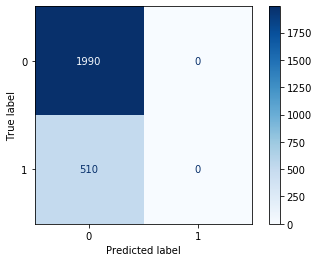

In [11]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=1234)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

cm = plot_confusion_matrix(model, features_valid, target_valid, cmap="Blues")  
plt.show()

    По графику видно, что модель хорошо определяет, когда клиент остался, но плохо понимает, когда клиент ушёл

Оценю метрики модели

# Качество

In [12]:
display(accuracy_score(target_valid, predicted_valid))

0.796

    Сложно оценить только по одной метрике, нужно посмотреть остальные

# Полнота

In [13]:
display(recall_score(target_valid, predicted_valid))

0.0

Т.к. полнота стремится к 1, результат не самый лучший

# Точность

In [14]:
display(precision_score(target_valid, predicted_valid))

/home/jovyan/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

Аналогично

# F1

In [15]:
display(f1_score(target_valid, predicted_valid))

0.0

    Для успешной сдачи метрика должна быть неменее 0.59

# Вывод:
    Модель совсем не понимает как определять целевой признак, выбирая везде 0 она показала качество на уровне 80%, но фактически нечему не научилась
    Т.к. метрики качества продемонстрировали невысокие результаты, попробую увеличить показатели 

## Борьба с дисбалансом

###  Баланс классов

    Обучу модель со сбалансированными весами классов

/home/jovyan/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Balanced: 0.4828070175438597


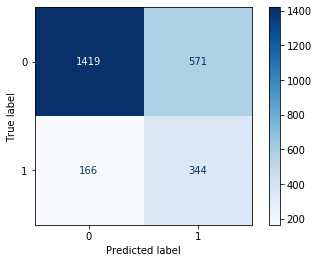

In [16]:
model = LogisticRegression(random_state=1234, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Balanced: {}'.format(f1_score(target_valid, predicted_valid)))
cm = plot_confusion_matrix(model, features_valid, target_valid, cmap="Blues")  
plt.show()

    Показатель стал ещё ниже

### Увеличение выборки

    Проверяю как повлияет на модель увеличение выборки

Upsampled: 0.4892086330935252


/home/jovyan/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


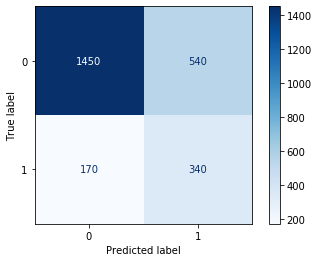

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1234
        )
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)


model.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled = model.predict(features_valid)


print('Upsampled: {}'.format(f1_score(target_valid, predicted_valid_upsampled)))
cm = plot_confusion_matrix(model, features_valid, target_valid, cmap="Blues")  
plt.show()

    Примерно на том же уровне

### Уменьшение выборки

    Аналогично проверяю уменьшение выборки

Downsampled: 0.4596443228454173


/home/jovyan/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


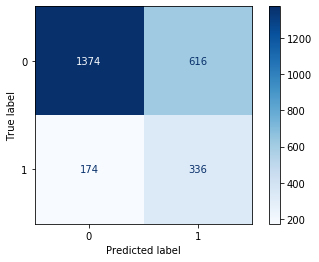

In [18]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1234)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1234)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1234)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)


model.fit(features_downsampled, target_downsampled)
predicted_valid_downsampled = model.predict(features_valid)


print('Downsampled: {}'.format(f1_score(target_valid, predicted_valid_downsampled)))
cm = plot_confusion_matrix(model, features_valid, target_valid, cmap="Blues")  
plt.show()

    увы

### Изменение порога

    Далее проверяю влияние изменения пороговой вероятности класса

In [19]:
model = LogisticRegression(random_state=1234, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


for threshold in np.arange(0, 0.32, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid) 
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.02 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.04 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.06 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.08 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.10 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.12 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.14 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.16 | Точность = 0.251, Полнота = 0.780, f1 = 0.380
Порог = 0.18 | Точность = 0.251, Полнота = 0.775, f1 = 0.379
Порог = 0.20 | Точность = 0.255, Полнота = 0.739, f1 = 0.380
Порог = 0.22 | Точность = 0.270, Полнота = 0.590, f1 = 0.371
Порог = 0.24 | Точность = 0.249, Полнота = 0.271, f1 = 0.259
Порог = 0.26 | Точность = 0.253, Полнота = 0.088, f1 = 0.131
Порог = 0.28 | Точность = 0.364, Полнота = 0.031, f1 = 0.058
Порог = 0.30 | Точность = 0.667, Полнота = 0.008, f1 = 0.016


    Добавив параметр f1 выбираю наилучшее значение порога

### PR - кривая

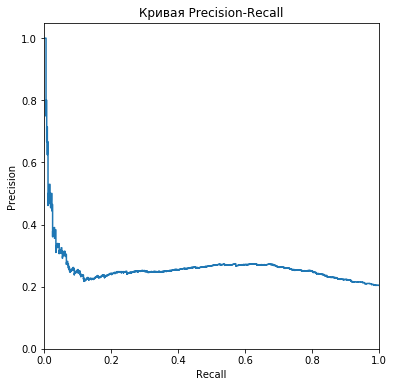

In [20]:
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

### TPR и FPR

In [21]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC ROC:', auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

AUC ROC: 0.604134397477584


### ROC-кривая

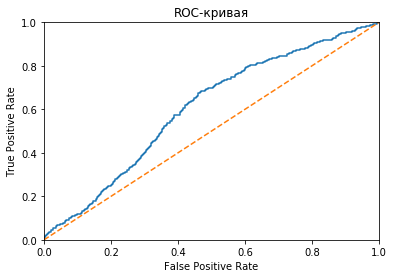

In [22]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

### Сравнение разных моделей

    Буду сравнивать 3 модели: логистическую регрессию, дерево принятия решений и случайный лес. Сравнение буду проводить на моделях без дополнительных настроек 

# Logistic Regression

In [23]:
model_LR = LogisticRegression(random_state=1234, solver='liblinear')

In [24]:
model_LR.fit(features_train, target_train)
predicted_valid = model_LR.predict(features_valid)
print('F1 score: {}'.format(f1_score(target_valid, predicted_valid)))

probabilities_valid = model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc)

F1 score: 0.0
AUC ROC: 0.604134397477584


# Decision Tree Classifier

In [25]:
model_dtc = DecisionTreeClassifier(random_state=1234)
model_dtc.fit(features_train, target_train)
predicted_valid = model_dtc.predict(features_valid)
print('F1 score: {}'.format(f1_score(target_valid, predicted_valid)))

probabilities_valid = model_dtc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc)

F1 score: 0.4788461538461538
AUC ROC: 0.6735146319834466


# Random Forest Classifier

In [26]:
model_rfc = RandomForestClassifier(random_state=1234)
model_rfc.fit(features_train, target_train)
predicted_valid_upsampled = model_rfc.predict(features_valid)
print('F1 score: {}'.format(f1_score(target_valid, predicted_valid)))

probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:', auc_roc)

F1 score: 0.4788461538461538
AUC ROC: 0.8404424081190265


    Лучшие показатели оказались у модели случайного лес, на ней и буду проводить тест

## Тестирование модели

Для тестирования подберу наилучшие гиперпараметры, также применю техники которые показали лучшие результаты: взвешивание классов и увеличение выборки

In [27]:
rfc = RandomForestClassifier(random_state=1234, class_weight='balanced')
param_grid = { 
    'n_estimators': [i for i in range(34, 37)],
    'max_depth' : [j for j in range(10, 15)],
    'max_features' : [k for k in range(2, 3)]
}
CV_rfc = GridSearchCV(rfc, 
                      param_grid = param_grid, 
                      cv = 5
                      )
CV_rfc.fit(features_train, target_train)

print("Лучшие гиперпараметры", CV_rfc.best_params_)
print("Точность :", CV_rfc.best_score_)

Audio(sound_file, autoplay=True)# звук окончания обучения

Лучшие гиперпараметры {'max_depth': 14, 'max_features': 2, 'n_estimators': 36}
Точность : 0.8551419168334444


In [28]:
model_rfc = CV_rfc.best_estimator_
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled = model_rfc.predict(features_valid)
print('F1 balanced upsampled:', f1_score(target_valid, predicted_valid_upsampled))

probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC', auc_roc)

F1 balanced upsampled: 0.5970149253731343
AUC ROC 0.8394728544684205


    Подбор гиперепараметров и применение взвешивания классов и увеличения выборки помогли достичь F1-меры уровня 0.6

# PS

    Можно добавить в функции train_test_split параметр stratify и указать целевой признак

In [29]:
another_features_train, another_features_valid, another_target_train, another_target_valid = train_test_split(
    features, 
    target, 
    test_size=0.25, 
    random_state=1234, 
    stratify = target
)

Тогда модель изначально лучше понимает где 0, где 1

In [30]:
another_model = RandomForestClassifier(random_state=1234, class_weight='balanced')
another_model.fit(another_features_train, another_target_train)
another_predicted_valid = another_model.predict(another_features_valid)
print(confusion_matrix(another_target_valid, another_predicted_valid))

[[1922   69]
 [ 277  232]]


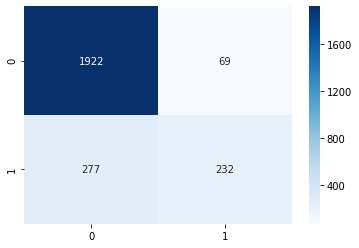

In [31]:
conf_matr = confusion_matrix(another_target_valid, another_predicted_valid)
sn.heatmap(conf_matr, annot=True, fmt="d", cmap="Blues")
plt.show() 

    Достаточно подобрать подходящие гиперпараметры

In [32]:
another_rfc = RandomForestClassifier(random_state=1234)
param_grid = { 
    'n_estimators': [i for i in range(32, 36)],
    'max_depth' : [j for j in range(10, 15)],
    'max_features' : [k for k in range(1, 3)]
}
CV_rfc = GridSearchCV(rfc, 
                      param_grid = param_grid, 
                      cv = 5
                      )
CV_rfc.fit(another_features_train, another_target_train)

print("Лучшие гиперпараметры", CV_rfc.best_params_)
print("Точность:", CV_rfc.best_score_)

Audio(sound_file, autoplay=True)# звук окончания обучения

Лучшие гиперпараметры {'max_depth': 14, 'max_features': 2, 'n_estimators': 32}
Точность: 0.8536755170113409


    F1-мера при таком способе разделения при подходящих гиперпараметрах - 0.59

In [33]:
another_model_rfc = CV_rfc.best_estimator_
another_model_rfc.fit(another_features_train, another_target_train)
another_predicted_valid_upsampled = another_model_rfc.predict(another_features_valid)
print('F1 balanced upsampled', f1_score(another_target_valid, another_predicted_valid_upsampled))

another_probabilities_valid = another_model_rfc.predict_proba(another_features_valid)
another_probabilities_one_valid = another_probabilities_valid[:, 1]
another_auc_roc = roc_auc_score(another_target_valid, another_probabilities_one_valid)
print('AUC ROC', another_auc_roc)

F1 balanced upsampled 0.5924276169265033
AUC ROC 0.838903257191744


    Оценю какие признаки оказались самыми значимыми:

In [34]:
feature_names = [f'{i}' for i in features_upsampled]
print(feature_names)

['Age', 'CustomerId', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [35]:
start_time = time.time()
importances = model_rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in model_rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.006 seconds


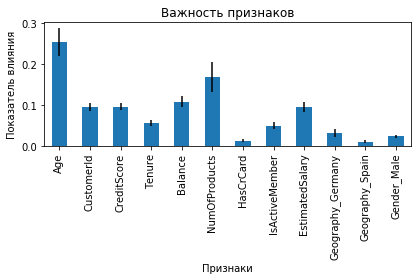

In [36]:
model_rfc_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
model_rfc_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel("Показатель влияния")
ax.set_xlabel("Признаки")
fig.tight_layout()

In [37]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model_rfc, features_valid, target_valid, n_repeats=10, random_state=1234, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 5.398 seconds


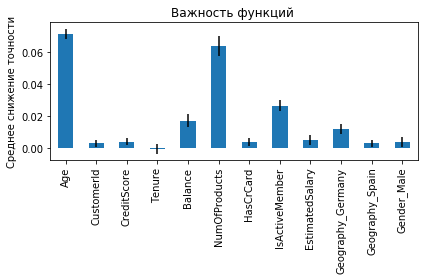

In [38]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Важность функций ")
ax.set_ylabel("Среднее снижение точности")
fig.tight_layout()
plt.show()